# mnist

In [9]:
import numpy

In [ ]:
import matplotlib.pyplot as plt

In [1]:
from tensorflow.keras.datasets import mnist

2025-05-05 12:23:12.558213: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-05 12:23:12.558680: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-05 12:23:12.561503: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-05 12:23:12.568930: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746444192.581821    1031 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746444192.58

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [5]:
len(train_labels), len(test_labels)

(60000, 10000)

In [7]:
type(train_labels[0])

numpy.uint8

In [12]:
images = numpy.concatenate((train_images, test_images))

In [13]:
len(images)

70000

In [14]:
labels = numpy.concatenate((train_labels, test_labels))

In [15]:
len(labels)

70000

In [26]:
permutation_index = numpy.random.permutation(len(labels))

In [27]:
permute_images = images[permutation_index]

In [28]:
permute_labels = labels[permutation_index]

In [34]:
new_train_images = permute_images[0:50000]
new_train_labels = permute_labels[0:50000]

In [35]:
new_test_images = permute_images[50000:60000]
new_test_labels = permute_labels[50000:60000]

In [37]:
new_validation_images = permute_images[60000:]
new_validation_labels = permute_labels[60000:]

invert the colors

In [109]:
new_train_images = 255 - new_train_images

In [111]:
new_test_images = 255 - new_test_images

In [112]:
new_validation_images = 255 - new_validation_images

example: how to produce a single png image

In [38]:
image = new_train_images[0]
image.shape

(28, 28)

In [41]:
type(image[0][0])

numpy.uint8

In [45]:
import png

In [54]:
writer = png.Writer(width=28, height=28, bitdepth=8, greyscale=True)
with open('output.png', 'wb') as f:
    writer.write(f, numpy.reshape(image, shape=(28,28)))

In [ ]:
png.from_array(numpy.reshape(image, shape=(28,28)), 'L')

select first digits 0-9

In [124]:
digit_index = numpy.array([], dtype=numpy.int64)
for digit in range(10):
    digit_index = numpy.append(digit_index, numpy.where(new_train_labels == digit)[0][0])

digit_index

array([ 6, 10,  0,  5,  1, 12, 13,  9, 20,  3])

In [ ]:
# is now working, but below more efficient
all_digit_image = numpy.reshape(numpy.array([], dtype=numpy.uint8), shape=(0,28))
print(all_digit_image)

for digit_index_ in numpy.nditer(digit_index):
    digit_image = new_train_images[digit_index_]
    digit_image_reshape = numpy.reshape(digit_image, shape=(28,28))
    all_digit_image = numpy.concatenate((all_digit_image, digit_image_reshape), axis=0)

writer = png.Writer(width=all_digit_image.shape[1], height=all_digit_image.shape[0], bitdepth=8, greyscale=True)
with open('all_digit_image_0.png', 'wb') as ofile:
    writer.write(ofile, all_digit_image)

In [126]:
digit_index

array([ 6, 10,  0,  5,  1, 12, 13,  9, 20,  3])

In [127]:
all_digit_images = []

for digit_index_ in numpy.nditer(digit_index):
    digit_image = new_train_images[digit_index_]
    digit_image_reshape = numpy.reshape(digit_image, shape=(28,28))
    all_digit_images.append(digit_image_reshape)

len(all_digit_images)

10

In [128]:
all_digit_image = numpy.concatenate(all_digit_images)
all_digit_image.shape

(280, 28)

In [129]:
writer = png.Writer(width=all_digit_image.shape[1], height=all_digit_image.shape[0], bitdepth=8, greyscale=True)
with open('all_digit_image.png', 'wb') as ofile:
    writer.write(ofile, all_digit_image)

print the first 100 digits, with their index, and their label

In [113]:
size_y = 100
size_x = 10

tmp = numpy.full((size_y*28, size_x*28), 255, dtype=numpy.uint8)

for i in range(size_y):
    i_string = f'{i}'
    
    oix_x = 28 * 0
    oix_y = 28 * i

    # print the index number
    for i_string_char in i_string:
        i_string_char_int = int(i_string_char) - int('0')
        #print(f'character is: {i_string_char}, {i_string_char_int}')
        tmp[oix_y:oix_y+28, oix_x:oix_x+28] = new_train_images[digit_index[i_string_char_int]]
        oix_x += 28

    oix_x = 28 * 5 # assumes max 5 chars for index
    oix_x += 28 # leave a space

    # print the label
    i_label = new_train_labels[i]
    tmp[oix_y:oix_y+28, oix_x:oix_x+28] = new_train_images[digit_index[i_label]]

    oix_x += 28 * 2
    
    # print the actual image observed
    tmp[oix_y:oix_y+28, oix_x:oix_x+28] = new_train_images[i]

    oix_x = 28 * 0
    oix_y += 28
    #break

writer = png.Writer(width=tmp.shape[1], height=tmp.shape[0], bitdepth=8, greyscale=True)
with open('tmp.png', 'wb') as ofile:
    writer.write(ofile, tmp)

train neural net

In [133]:
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [134]:
from tensorflow import keras
from tensorflow.keras import layers

In [349]:
# this is my model
layer_size = 8 #28
print(f'layer size: {layer_size}')

model = keras.Sequential([
    layers.Dense(layer_size, activation='relu'),
    layers.Dense(10, activation='softmax'),
])

model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

layer size: 8


In [158]:
# this is the original model
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [142]:
new_train_images_float = new_train_images.astype('float32') / 255.0
new_test_images_float = new_test_images.astype('float32') / 255.0
new_validation_images_float = new_validation_images.astype('float32') / 255.0

In [146]:
new_train_images_float = new_train_images_float.reshape((new_train_images_float.shape[0], new_train_images_float.shape[1]*new_train_images_float.shape[2]))
new_test_images_float = new_test_images_float.reshape((new_test_images_float.shape[0], new_test_images_float.shape[1]*new_test_images_float.shape[2]))
new_validation_images_float = new_validation_images_float.reshape((new_validation_images_float.shape[0], new_validation_images_float.shape[1]*new_validation_images_float.shape[2]))

In [147]:
new_train_images_float.shape

(50000, 784)

In [148]:
new_train_labels.shape

(50000,)

In [150]:
type(new_train_labels)

numpy.ndarray

In [151]:
type(new_train_images_float)

numpy.ndarray

In [152]:
new_train_labels.dtype

dtype('uint8')

In [153]:
new_train_images_float.dtype

dtype('float32')

In [154]:
new_train_labels

array([2, 4, 2, ..., 5, 4, 5], dtype=uint8)

In [156]:
new_train_images_float

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]], dtype=float32)

In [ ]:
model_history = model.fit(new_train_images_float, new_train_labels, epochs=10000, batch_size=128)

Epoch 1/10000
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2391 - loss: 2.0890
Epoch 2/10000
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5675 - loss: 1.2867
Epoch 3/10000
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7324 - loss: 0.9010
Epoch 4/10000
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7730 - loss: 0.7526
Epoch 5/10000
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7954 - loss: 0.6754
Epoch 6/10000
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8079 - loss: 0.6389
Epoch 7/10000
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8141 - loss: 0.6164
Epoch 8/10000
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8244 - loss: 0.5850
Epoch 9/10000
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8251 - loss: 0.5834
Epoch 10/10000
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8293 - loss: 0.5686
Epoch 11/10000
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8310 - loss: 0.5568
Epoch 12/10000
391/

In [ ]:
model_history.history['accuracy']

In [ ]:
model_history.history['loss']

In [345]:
accuracy = model_history.history['accuracy'][100:]

In [346]:
loss = model_history.history['loss'][100:]

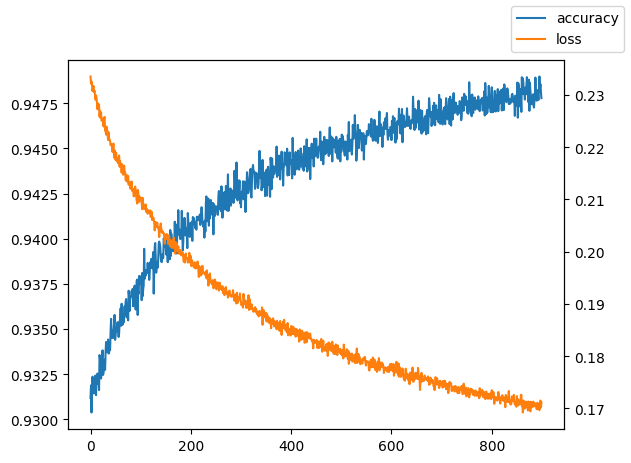

In [348]:
fig, ax = plt.subplots(1, 1)
ax.plot(accuracy, label='accuracy')
ax2 = ax.twinx()
ax2.plot(loss, color='tab:orange', label='loss')
fig.legend()

In [161]:
28*28

784

In [312]:
# check the training dataset, not the test dataset
test_digits = new_train_images_float #[0:3] # test all!
predictions = model.predict(test_digits)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


In [313]:
predictions.shape

(50000, 10)

In [314]:
for prediction in predictions[0:3]:
    for v in prediction:
        print(v, end=', ')
    print('')

0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 
0.0, 0.0, 2.5064479e-20, 0.0, 1.0, 0.0, 1.0644088e-31, 3.7142803e-27, 0.0, 4.2796948e-35, 
0.0, 0.0, 1.0, 2.1913544e-29, 0.0, 0.0, 0.0, 5.1067813e-23, 0.0, 0.0, 


In [315]:
# this array contains the predicted digit value
predictions_argmax = predictions.argmax(axis=1)

In [316]:
predictions_argmax.shape

(50000,)

In [317]:
# for example: [2, 4, 2, 9, 9, 3, ...] means the digits should be
# 2, 4, 2, 9, 9, 3, ...
predictions_argmax[0:3]

array([2, 4, 2])

In [318]:
for i, arg in enumerate(predictions.argmax(axis=1)[0:3]):
    print(predictions[i, arg])

1.0
1.0
1.0


In [319]:
predictions_max_probability = predictions[numpy.arange(len(predictions)), predictions.argmax(axis=1)]

In [320]:
predictions_max_probability

array([1., 1., 1., ..., 1., 1., 1.], dtype=float32)

In [321]:
predictions_max_probability_sort_order_index = numpy.argsort(predictions_max_probability)

In [322]:
predictions_max_probability_sort_order_index

array([ 8064,  9001, 18921, ..., 49998, 49999,     0])

In [323]:
predictions_max_probability_sorted = predictions_max_probability[predictions_max_probability_sort_order_index]

In [324]:
predictions_max_probability_sorted

array([0.9999875, 0.9999902, 0.9999906, ..., 1.       , 1.       ,
       1.       ], dtype=float32)

In [325]:
predictions_argmax_sorted = predictions_argmax[predictions_max_probability_sort_order_index]

In [326]:
predictions_argmax_sorted

array([7, 4, 1, ..., 4, 5, 2])

In [327]:
#images_sorted = (new_train_images[0:3])[predictions_max_probability_sort_order_index]
images_sorted = new_train_images[predictions_max_probability_sort_order_index]

In [328]:
images_sorted.shape

(50000, 28, 28)

In [329]:
images_sorted_index = numpy.arange(images_sorted.shape[0])[predictions_max_probability_sort_order_index]
images_sorted_index

array([ 8064,  9001, 18921, ..., 49998, 49999,     0])

In [330]:
def print_output(filename, predictions_argmax_sorted, images_sorted, images_sorted_index):
    size_y = 100
    size_x = 10

    tmp = numpy.full((size_y*28, size_x*28), 255, dtype=numpy.uint8)

    for i in range(len(predictions_argmax_sorted)):
        prediction = predictions_argmax_sorted[i]
        image = images_sorted[i]
        image_index = images_sorted_index[i]
    
        oix_x = 28 * 0
        oix_y = 28 * i

        image_index_string = f'{image_index}'
        for ch in image_index_string:
            ch_int = int(ch) - int('0')
            tmp[oix_y:oix_y+28, oix_x:oix_x+28] = new_train_images[digit_index[ch_int]]
            oix_x += 28

        oix_x = 28 * 5 # assumes max 5 chars for index
        oix_x += 28 # leave a space
                
        # print the label
        i_label = predictions_argmax_sorted[i]
        tmp[oix_y:oix_y+28, oix_x:oix_x+28] = new_train_images[digit_index[i_label]]
    
        oix_x += 28 * 2
        
        # print the actual image observed
        tmp[oix_y:oix_y+28, oix_x:oix_x+28] = images_sorted[i]
    
        oix_x = 28 * 0
        oix_y += 28
        
    
    writer = png.Writer(width=tmp.shape[1], height=tmp.shape[0], bitdepth=8, greyscale=True)
    with open(filename, 'wb') as ofile:
        writer.write(ofile, tmp)

In [331]:
max_count = 100

print_output('first_test_output.png', predictions_argmax_sorted[0:max_count], images_sorted[0:max_count], images_sorted_index[0:max_count])